In [1]:
import numpy as np

In [118]:
H = np.loadtxt('housing.data')
H

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [119]:
b = H[:,-1] # housing values in $1000s
b

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [120]:
A = H[:,:-1] # other factors
A

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [121]:
A = np.pad(A,[(0,0),(0,1)],mode='constant',constant_values=1)
A

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        1.0000e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        1.0000e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        1.0000e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        1.0000e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        1.0000e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.0000e+00]])

In [122]:
U,S,VT = np.linalg.svd(A, full_matrices=False)

In [123]:
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
x

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01,  3.64594884e+01])

/home/usv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.
/home/usv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """


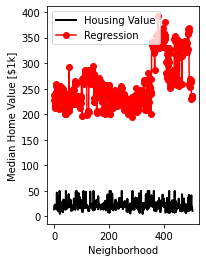

In [117]:
fig = plt.figure()
ax1 = fig.add_subplot(121)

plt.plot(b, Color='k', LineWidth=2, label='Housing Value') # True relationship
plt.plot(A@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

plt.show()

/home/usv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.
/home/usv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """
/home/usv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]
/home/usv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


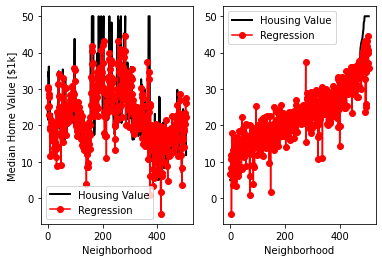

In [124]:
fig = plt.figure()
ax1 = fig.add_subplot(121)

plt.plot(b, Color='k', LineWidth=2, label='Housing Value') # True relationship
plt.plot(A@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

ax2 = fig.add_subplot(122)
sort_ind = np.argsort(H[:,-1])
b = b[sort_ind] # sorted values
plt.plot(b, Color='k', LineWidth=2, label='Housing Value') # True relationship
plt.plot(A[sort_ind,:]@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.legend()
plt.show()

/home/usv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.
/home/usv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.
/home/usv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """


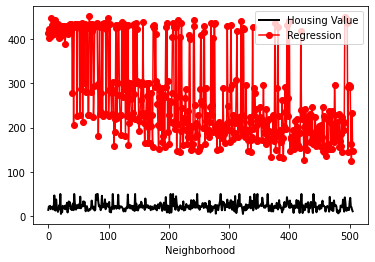

In [115]:

ax2 = fig.add_subplot(122)
sort_ind = np.argsort(H[:,-1])
b = b[sort_ind] # sorted values
plt.plot(b, Color='k', LineWidth=2, label='Housing Value') # True relationship
plt.plot(A[sort_ind,:]@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.legend()
plt.show()

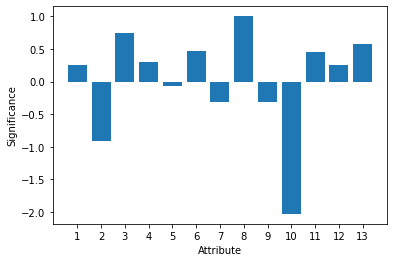

In [112]:
A_mean = np.mean(A,axis=0)
A_mean = A_mean.reshape(-1, 1)

A2 = A - np.ones((A.shape[0],1)) @ A_mean.T

for j in range(A.shape[1]-1):
    A2std = np.std(A2[:,j])
    A2[:,j] = A2[:,j]/A2std
    
A2[:,-1] = np.ones(A.shape[0])

U, S, VT = np.linalg.svd(A2,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
x_tick = range(len(x)-1)+np.ones(len(x)-1)
plt.bar(x_tick,x[:-1])
plt.xlabel('Attribute')
plt.ylabel('Significance')
plt.xticks(x_tick)
plt.show()

In [89]:
A = np.loadtxt('hald_ingredients.csv',delimiter=',')
A

array([[ 7., 26.,  6., 60.],
       [ 1., 29., 15., 52.],
       [11., 56.,  8., 20.],
       [11., 31.,  8., 47.],
       [ 7., 52.,  6., 33.],
       [11., 55.,  9., 22.],
       [ 3., 71., 17.,  6.],
       [ 1., 31., 22., 44.],
       [ 2., 54., 18., 22.],
       [21., 47.,  4., 26.],
       [ 1., 40., 23., 34.],
       [11., 66.,  9., 12.],
       [10., 68.,  8., 12.]])

In [91]:
b = np.loadtxt('hald_heat.csv',delimiter=',')
b

array([ 78.5,  74.3, 104.3,  87.6,  95.9, 109.2, 102.7,  72.5,  93.1,
       115.9,  83.8, 113.3, 109.4])

In [93]:
U,S,VT = np.linalg.svd(A,full_matrices=False)
print(U,"U")
print(S,"S")
print(VT,"VT")

[[-0.25198143 -0.49575166  0.24094445  0.33739303]
 [-0.25021671 -0.39897789 -0.16228266  0.18958829]
 [-0.28296417  0.14598273  0.1478218  -0.0196681 ]
 [-0.24607722 -0.31826717  0.23308515 -0.14452909]
 [-0.29284214 -0.02490943  0.15631779  0.48051738]
 [-0.28455587  0.11627573  0.12812606 -0.07374165]
 [-0.31379477  0.38729964 -0.31564043  0.1243492 ]
 [-0.24623151 -0.30360648 -0.37686612 -0.29484915]
 [-0.28358624  0.09629558 -0.31575462  0.02325539]
 [-0.26337581  0.02938163  0.497746   -0.60068283]
 [-0.25980212 -0.13430501 -0.43516411 -0.31372155]
 [-0.30513498  0.29969568  0.09765536  0.00429493]
 [-0.31153827  0.31326044  0.10278724  0.17439289]] U
[211.33694119  77.23560956  28.45965697  10.26673399] S
[[-0.12790429 -0.83980147 -0.19844687 -0.48886892]
 [ 0.04276717  0.50916305 -0.07212349 -0.85657584]
 [ 0.64590387  0.01812007 -0.75571522  0.10665064]
 [-0.75141177  0.18750504 -0.61992867  0.12613746]] VT


In [96]:
S = np.diag(S)
S_inv = np.linalg.inv(S)
print(S,"S")
print(S_inv,"S_inv")

[[211.33694119   0.           0.           0.        ]
 [  0.          77.23560956   0.           0.        ]
 [  0.           0.          28.45965697   0.        ]
 [  0.           0.           0.          10.26673399]] S
[[0.00473178 0.         0.         0.        ]
 [0.         0.0129474  0.         0.        ]
 [0.         0.         0.03513746 0.        ]
 [0.         0.         0.         0.09740196]] S_inv


In [99]:
x = VT.T @ S_inv @ U.T @ b
x

array([2.19304602, 1.15332597, 0.75850914, 0.48631933])

/home/usv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """Entry point for launching an IPython kernel.
/home/usv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


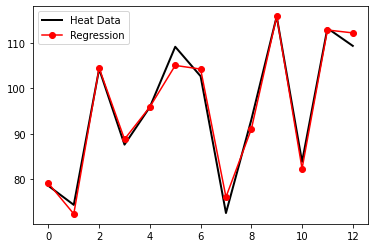

In [100]:
plt.plot(b, Color='k', LineWidth=2, label='Heat Data') # True relationship
plt.plot(A@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.legend()
plt.show()

In [60]:
x = 3

In [71]:
a = np.arange(-2,2,1/3.0)
a

array([-2.00000000e+00, -1.66666667e+00, -1.33333333e+00, -1.00000000e+00,
       -6.66666667e-01, -3.33333333e-01, -4.44089210e-16,  3.33333333e-01,
        6.66666667e-01,  1.00000000e+00,  1.33333333e+00,  1.66666667e+00])

In [72]:
a = a.reshape(-1,1)
a

array([[-2.00000000e+00],
       [-1.66666667e+00],
       [-1.33333333e+00],
       [-1.00000000e+00],
       [-6.66666667e-01],
       [-3.33333333e-01],
       [-4.44089210e-16],
       [ 3.33333333e-01],
       [ 6.66666667e-01],
       [ 1.00000000e+00],
       [ 1.33333333e+00],
       [ 1.66666667e+00]])

In [73]:
b = x * a
b

array([[-6.00000000e+00],
       [-5.00000000e+00],
       [-4.00000000e+00],
       [-3.00000000e+00],
       [-2.00000000e+00],
       [-1.00000000e+00],
       [-1.33226763e-15],
       [ 1.00000000e+00],
       [ 2.00000000e+00],
       [ 3.00000000e+00],
       [ 4.00000000e+00],
       [ 5.00000000e+00]])

In [74]:
noise = np.random.randn(*a.shape)
noise

array([[ 0.864728  ],
       [ 0.19464606],
       [ 2.3462662 ],
       [-0.33254676],
       [-0.01069074],
       [-0.27949154],
       [-1.44743942],
       [ 0.10651468],
       [-0.6480443 ],
       [-2.05654794],
       [ 1.41783345],
       [-0.56400573]])

In [75]:
b = x*a + noise
b

array([[-5.135272  ],
       [-4.80535394],
       [-1.6537338 ],
       [-3.33254676],
       [-2.01069074],
       [-1.27949154],
       [-1.44743942],
       [ 1.10651468],
       [ 1.3519557 ],
       [ 0.94345206],
       [ 5.41783345],
       [ 4.43599427]])

In [76]:
U, S, VT = np.linalg.svd(a, full_matrices=False)
print(S, "S")
print(VT, "VT")
print(U,"U")

[4.02768199] S
[[1.]] VT
[[-4.96563533e-01]
 [-4.13802944e-01]
 [-3.31042355e-01]
 [-2.48281767e-01]
 [-1.65521178e-01]
 [-8.27605889e-02]
 [-1.10259254e-16]
 [ 8.27605889e-02]
 [ 1.65521178e-01]
 [ 2.48281767e-01]
 [ 3.31042355e-01]
 [ 4.13802944e-01]] U


In [77]:
S = np.diag(S)
S_inv = np.linalg.inv(S)
print(S, "S")
print(S_inv, "S_inv")

[[4.02768199]] S
[[0.24828177]] S_inv


In [85]:
X_tilde1 = VT.T @ S_inv @ U.T @ b
X_tilde1

array([[2.61460146]])

In [82]:
X_tilde2 = np.linalg.pinv(a) @ b
X_tilde2

array([[2.61460146]])

/home/usv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
/home/usv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until
/home/usv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.
/home/usv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """


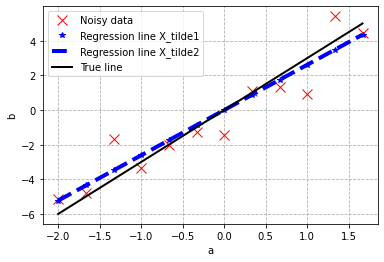

In [88]:
import matplotlib.pyplot as plt
plt.plot(a, b, 'x', Color='r', MarkerSize = 10, label='Noisy data') # Noisy measurements
plt.plot(a,X_tilde1 * a,'*',Color='b',LineWidth=4, label='Regression line X_tilde1')
plt.plot(a,X_tilde2 * a,'--',Color='b',LineWidth=4, label='Regression line X_tilde2')
plt.plot(a, x*a, Color='k', LineWidth=2, label='True line') # True relationship
plt.xlabel('a')
plt.ylabel('b')

plt.grid(linestyle='--')
plt.legend()
plt.show()


/home/usv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """Entry point for launching an IPython kernel.


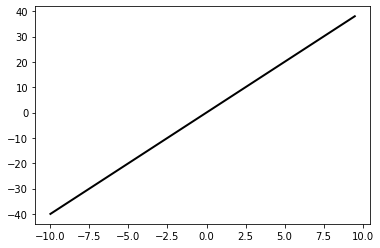

In [13]:
plt.plot(a, x*a, Color='k', LineWidth=2, label='True line') # True relationship


In [28]:
U,S,VT = np.linalg.svd(a, full_matrices=False)
print(VT)
print(S)

[[1.]]
[36.53765181]


In [29]:
S = np.diag(S)
S

array([[36.53765181]])

In [33]:
x_tilde = VT.T @ np.linalg.inv(S) @ U.T @ b
x_tilde

array([[3.95685246]])

/home/usv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """Entry point for launching an IPython kernel.


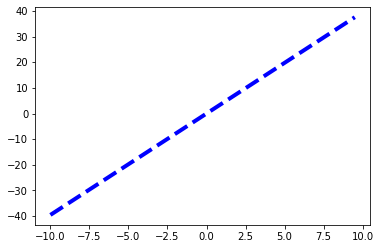

In [34]:
plt.plot(a,x_tilde * a,'--',Color='b',LineWidth=4, label='Regression line')
